# Exploring the raw data

## Introducing the challenge

Natural language processing to label each data to suggest labels for unlabeled lines. Predictions will be probabilities.


## Exploring the data

### Loading the data

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("TrainingData.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400277 entries, 134338 to 415831
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Function                400277 non-null  object 
 1   Use                     400277 non-null  object 
 2   Sharing                 400277 non-null  object 
 3   Reporting               400277 non-null  object 
 4   Student_Type            400277 non-null  object 
 5   Position_Type           400277 non-null  object 
 6   Object_Type             400277 non-null  object 
 7   Pre_K                   400277 non-null  object 
 8   Operating_Status        400277 non-null  object 
 9   Object_Description      375493 non-null  object 
 10  Text_2                  88217 non-null   object 
 11  SubFund_Description     306855 non-null  object 
 12  Job_Title_Description   292743 non-null  object 
 13  Text_3                  109152 non-null  object 
 14  Text_4         

### Summarizing the data

                 FTE         Total
count  126071.000000  3.957220e+05
mean        0.426794  1.310586e+04
std         0.573576  3.682254e+05
min        -0.087551 -8.746631e+07
25%         0.000792  7.379770e+01
50%         0.130927  4.612300e+02
75%         1.000000  3.652662e+03
max        46.800000  1.297000e+08


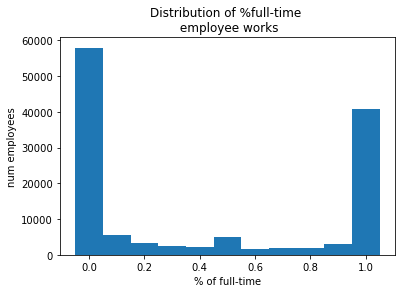

In [53]:
print(df.describe())
import numpy as np
bins = (np.arange(0, 10+1.5)-0.5)/10
plt.hist(df["FTE"].dropna(), bins=bins)
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')
plt.show()

The high variance in expenditures makes sense (some purchases are cheap some are expensive).

## Looking at the datatypes

Machine learning algorithms work on numbers so string type columns are problematic. We need a numeric representation of these strings. Category dtype encodes categorical data numerically. To see the numeric representation of categories get_dummies can be used. It is also binary indicator representation.


### Exploring datatypes in pandas

In [57]:
df.dtypes.value_counts()

object     23
float64     2
dtype: int64

That's a lot of (slow) object types. Type conversion is needed.



### Encode the labels as categorical variables

In [65]:
LABELS = ['Function',
  'Use',
  'Sharing',
  'Reporting',
  'Student_Type',
  'Position_Type',
  'Object_Type',
  'Pre_K',
  'Operating_Status']

categorize_lables = lambda x: x.astype("category")
print(df[LABELS].dtypes)
df[LABELS] = df[LABELS].apply(categorize_lables, axis =0)
print(df[LABELS].dtypes)

# df[LABELS] = categorize_lables(df[LABELS])
# print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object
Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


### Counting unique labels

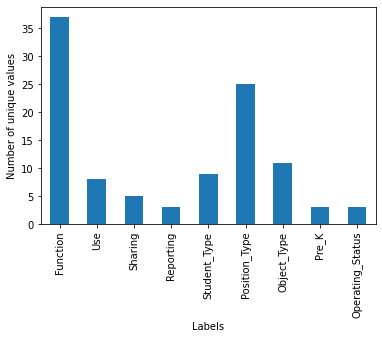

In [71]:
# num_unique_labels = df[LABELS].nunique()
num_unique_labels = df[LABELS].apply(pd.Series.nunique)
num_unique_labels.plot(kind="bar")
plt.xlabel('Labels')
plt.ylabel('Number of unique values')
plt.show()

## How do we measure success?


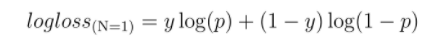Logloss (loss function) measures error.

In [101]:
print(np.log(0.9))
print(np.log(0.1))

-0.10536051565782628
-2.3025850929940455


### Computing log loss with NumPy

In [109]:
def compute_log_loss(predicted, actual, eps=1e-14):
    predicted = np.clip(predicted, eps, 1-eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1-actual) * np.log(1-predicted))
    return loss

actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
correct_not_confident= np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])

correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss))

correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss))

wrong_not_confiden_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confiden_loss))

wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss))

actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


Log loss penalizes highly confident wrong answers much more than any other type.